In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
df = pd.read_csv("/content/BTC-USD.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
1,2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2,2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
3,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
4,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
...,...,...,...,...,...,...,...
1823,2024-02-26,51730.539063,54938.175781,50931.031250,54522.402344,54522.402344,34074411896
1824,2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,57085.371094,49756832031
1825,2024-02-28,57071.097656,63913.132813,56738.425781,62504.789063,62504.789063,83239156760
1826,2024-02-29,62499.183594,63585.644531,60498.730469,61198.382813,61198.382813,65496611844


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        3859.583740
1        3864.415039
2        3847.175781
3        3761.557129
4        3896.375000
            ...     
1823    54522.402344
1824    57085.371094
1825    62504.789063
1826    61198.382813
1827    62440.632813
Name: Close, Length: 1828, dtype: float64

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
train_data.shape

(1279, 1)

In [ ]:
test_data.shape

(549, 1)

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 21ms/step - loss: 0.0160
Epoch 2/100
19/19 [==============================] - 0s 21ms/step - loss: 0.0012
Epoch 3/100
19/19 [==============================] - 0s 17ms/step - loss: 6.8010e-04
Epoch 4/100
19/19 [==============================] - 0s 17ms/step - loss: 5.6702e-04
Epoch 5/100
19/19 [==============================] - 0s 18ms/step - loss: 5.4675e-04
Epoch 6/100
19/19 [==============================] - 0s 17ms/step - loss: 5.2369e-04
Epoch 7/100
19/19 [==============================] - 0s 17ms/step - loss: 5.2697e-04
Epoch 8/100
19/19 [==============================] - 0s 16ms/step - loss: 5.0512e-04
Epoch 9/100
19/19 [==============================] - 0s 17ms/step - loss: 4.9797e-04
Epoch 10/100
19/19 [==============================] - 0s 18ms/step - loss: 4.9286e-04
Epoch 11/100
19/19 [==============================] - 0s 17ms/step - loss: 4.7893e-04
Epoch 12/100
19/19 [==============================] - 1s 31ms/step - lo

In [ ]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 7ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [ ]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 31924.06287459368
Testing MAPE: 8099807.780227932
Testing MSE: 1019145790.4210105


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52547483 0.53222443 0.53342358 0.5284448  0.52491918 0.53396104
 0.53439057 0.53210634 0.54740294 0.55974647 0.56761507 0.5989872
 0.63190847 0.62667061 0.61955864 0.63325559 0.62634993 0.62719179
 0.58744794 0.59068263 0.61325944 0.61534752 0.59819824 0.6030624
 0.5893417  0.60907165 0.60353901 0.62519432 0.62859376 0.63061162
 0.62656243 0.61522441 0.62458137 0.60745522 0.62191254 0.6091393
 0.60085702 0.6017582  0.60345532 0.63326704 0.64565844 0.61259231
 0.63346435 0.63319431 0.63047516 0.62975268 0.67720027 0.66417982
 0.67182882 0.6677666  0.61267056 0.61250152 0.59610612 0.60732305
 0.61740022 0.61093848 0.5877336  0.59331852 0.59405796 0.59218035
 0.56023287 0.56553311 0.56916171 0.56691635 0.596429   0.6011807
 0.59985697 0.6194894  0.61422907 0.60843011 0.61615938 0.61788472
 0.61485034 0.60844542 0.60962222 0.61629884 0.6356319  0.65104354
 0.67996956 0.68975054 0.69794172 0.72402585 0.72064398 0.75330984
 0.75506297 0.7585368  0.75074423 0.75794662 0.7525645

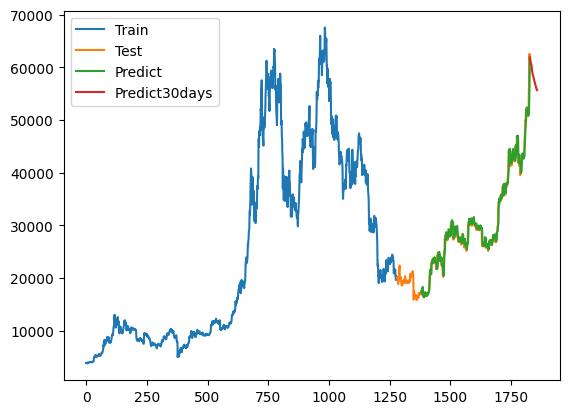

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [ ]:
x_input.shape

(1, 100, 1)

In [ ]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [ ]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [ ]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [ ]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 32ms/step - loss: 3.3381e-04
Epoch 2/100
22/22 [==============================] - 1s 32ms/step - loss: 3.6504e-04
Epoch 3/100
22/22 [==============================] - 1s 32ms/step - loss: 3.4027e-04
Epoch 4/100
22/22 [==============================] - 1s 32ms/step - loss: 3.3863e-04
Epoch 5/100
22/22 [==============================] - 0s 18ms/step - loss: 3.3481e-04
Epoch 6/100
22/22 [==============================] - 0s 17ms/step - loss: 3.4888e-04
Epoch 7/100
22/22 [==============================] - 0s 19ms/step - loss: 3.3064e-04
Epoch 8/100
22/22 [==============================] - 0s 18ms/step - loss: 3.4973e-04
Epoch 9/100
22/22 [==============================] - 0s 17ms/step - loss: 3.3812e-04
Epoch 10/100
22/22 [==============================] - 0s 17ms/step - loss: 3.4023e-04
Epoch 11/100
22/22 [==============================] - 0s 17ms/step - loss: 3.4136e-04
Epoch 12/100
22/22 [==============================] - 0s 18ms/s

In [ ]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 7ms/step


In [ ]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [ ]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 36633.36388249978
Testing MAPE: 7753841.902626234
Testing MSE: 1342003349.3476398


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52547483 0.53222443 0.53342358 0.5284448  0.52491918 0.53396104
 0.53439057 0.53210634 0.54740294 0.55974647 0.56761507 0.5989872
 0.63190847 0.62667061 0.61955864 0.63325559 0.62634993 0.62719179
 0.58744794 0.59068263 0.61325944 0.61534752 0.59819824 0.6030624
 0.5893417  0.60907165 0.60353901 0.62519432 0.62859376 0.63061162
 0.62656243 0.61522441 0.62458137 0.60745522 0.62191254 0.6091393
 0.60085702 0.6017582  0.60345532 0.63326704 0.64565844 0.61259231
 0.63346435 0.63319431 0.63047516 0.62975268 0.67720027 0.66417982
 0.67182882 0.6677666  0.61267056 0.61250152 0.59610612 0.60732305
 0.61740022 0.61093848 0.5877336  0.59331852 0.59405796 0.59218035
 0.56023287 0.56553311 0.56916171 0.56691635 0.596429   0.6011807
 0.59985697 0.6194894  0.61422907 0.60843011 0.61615938 0.61788472
 0.61485034 0.60844542 0.60962222 0.61629884 0.6356319  0.65104354
 0.67996956 0.68975054 0.69794172 0.72402585 0.72064398 0.75330984
 0.75506297 0.7585368  0.75074423 0.75794662 0.7525645

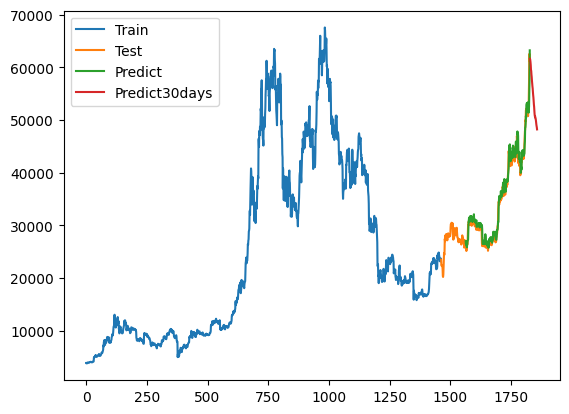

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [ ]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [ ]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [ ]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [ ]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 18ms/step - loss: 3.2300e-04
Epoch 2/100
25/25 [==============================] - 0s 18ms/step - loss: 2.8833e-04
Epoch 3/100
25/25 [==============================] - 0s 19ms/step - loss: 3.0941e-04
Epoch 4/100
25/25 [==============================] - 0s 17ms/step - loss: 2.8990e-04
Epoch 5/100
25/25 [==============================] - 0s 17ms/step - loss: 3.4893e-04
Epoch 6/100
25/25 [==============================] - 0s 17ms/step - loss: 3.1038e-04
Epoch 7/100
25/25 [==============================] - 0s 17ms/step - loss: 3.0494e-04
Epoch 8/100
25/25 [==============================] - 0s 18ms/step - loss: 2.9858e-04
Epoch 9/100
25/25 [==============================] - 0s 17ms/step - loss: 2.9762e-04
Epoch 10/100
25/25 [==============================] - 0s 18ms/step - loss: 3.2046e-04
Epoch 11/100
25/25 [==============================] - 1s 30ms/step - loss: 3.2160e-04
Epoch 12/100
25/25 [==============================] - 1s 31ms/s

In [ ]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 15ms/step


In [ ]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [ ]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 45199.59525616875
Testing MAPE: 6984801.259347915
Testing MSE: 2043003411.321473


In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.52547483 0.53222443 0.53342358 0.5284448  0.52491918 0.53396104
 0.53439057 0.53210634 0.54740294 0.55974647 0.56761507 0.5989872
 0.63190847 0.62667061 0.61955864 0.63325559 0.62634993 0.62719179
 0.58744794 0.59068263 0.61325944 0.61534752 0.59819824 0.6030624
 0.5893417  0.60907165 0.60353901 0.62519432 0.62859376 0.63061162
 0.62656243 0.61522441 0.62458137 0.60745522 0.62191254 0.6091393
 0.60085702 0.6017582  0.60345532 0.63326704 0.64565844 0.61259231
 0.63346435 0.63319431 0.63047516 0.62975268 0.67720027 0.66417982
 0.67182882 0.6677666  0.61267056 0.61250152 0.59610612 0.60732305
 0.61740022 0.61093848 0.5877336  0.59331852 0.59405796 0.59218035
 0.56023287 0.56553311 0.56916171 0.56691635 0.596429   0.6011807
 0.59985697 0.6194894  0.61422907 0.60843011 0.61615938 0.61788472
 0.61485034 0.60844542 0.60962222 0.61629884 0.6356319  0.65104354
 0.67996956 0.68975054 0.69794172 0.72402585 0.72064398 0.75330984
 0.75506297 0.7585368  0.75074423 0.75794662 0.7525645

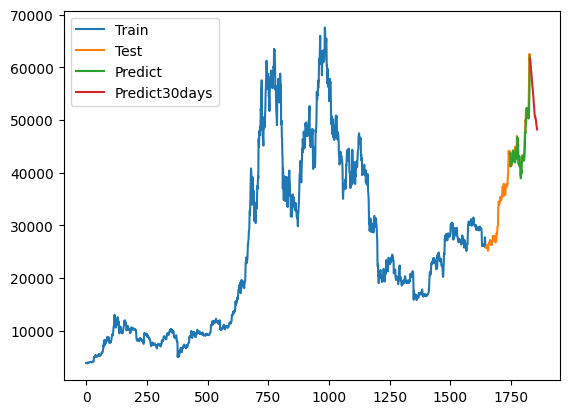

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()